In [1]:
# Libraries:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%pylab inline
import time


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Config:
# In order to display all the columns:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 50

In [2]:
data=pd.read_csv("./dataset/train.csv")

In [47]:
# Ploting:
# Groupby functions:
def plot_ctr(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(10,6))
    for list_advert in list_advert_tot:
        mean_data=data.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]
        # Droping nan:
        ts_mean=ts_mean.dropna()
        # STD:
        std_data=data.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]
        ts_std=ts_std.dropna()
        # Totals:
        totals=data.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]
        ts_totals=ts_totals.dropna()
        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin)
    plt.legend(list_advert_tot, loc="best")
    plt.ylabel("Market Price")
    plt.xlabel(x)
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.2)
#    plt.xticks(ts_mean.index)
    plt.xlim([-1, int(ts_mean.index[-1])+1])    

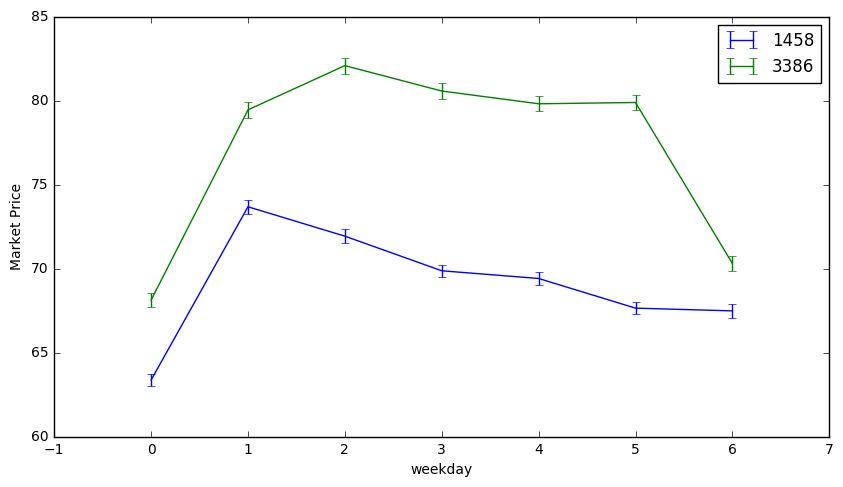

In [30]:
# Plotting 

x= "weekday"
y="payprice"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

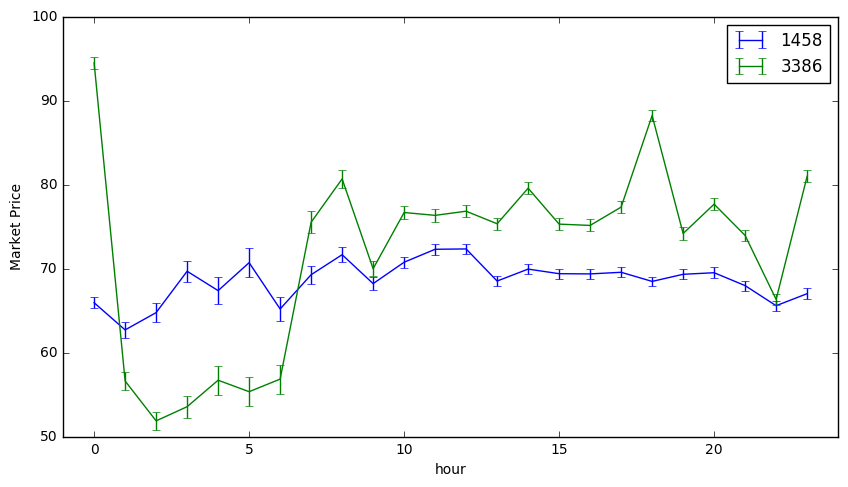

In [32]:
# Plotting 

x= "hour"
y="payprice"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

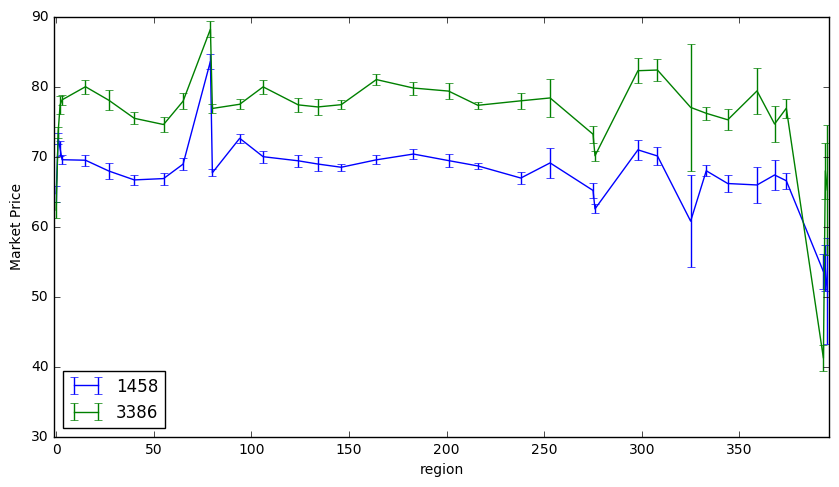

In [33]:
# Plotting 

x= "region"
y="payprice"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

In [7]:
# Analising:
print(len(data.columns))
data.head(5)

26


,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,1,trqRTJ27Pea7gspy,b3f4c620ae8d3df230fca2fbed50d247,null,mm_34061467_3440569_11228047,300,250,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111"
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,null,null,null,null,1,320,50,FirstView,Na,118,11908,277,118,null,2997,null
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,3,3FKElpuEMusyJqKbuKz,27a9c5cbd0466a2f4b089606f1236cac,null,ALLINONE_F_Width1,1000,90,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,3,DD1SqS9rg5scFsf,99d9720ba79b9826bc10cd822b5faa63,null,ALLINONE_F_Width1,1000,90,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,2,null,b99ce18c1023c0619f1708cf5202f4a3,null,4171454515,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null


In [21]:
df_train = pd.DataFrame(data.useragent.str.split('_',1).tolist(),
                                   columns = ['OS','browser'])

In [22]:
df_train

,OS,browser
0,windows,ie
1,windows,chrome
2,windows,ie
3,windows,ie
4,windows,chrome
5,windows,ie
6,windows,chrome
7,windows,chrome
8,windows,ie
9,windows,ie


In [23]:
train= pd.concat([data,df_train],axis=1)

In [24]:
train

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,OS,browser
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",windows,ie
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",windows,chrome
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,windows,ie
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111",windows,ie
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",windows,chrome
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,...,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063,windows,ie
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,...,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063",windows,chrome
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,...,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063",windows,chrome
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,...,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null,windows,ie
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110",windows,ie


In [37]:
def plot_(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(10,6))
    for list_advert in list_advert_tot:
        a = train.groupby('weekday')
        b= train.groupby([adv,x])

        click_count1 = a.click.value_counts()
        click_count2 = b.click.value_counts()

        a1 = click_count2.iloc[click_count2.index.get_level_values(list_advert)]
        CTR['a1'] = a1.iloc[a1.index.get_level_values(y) == 1].values

        total_impressions_advertiser = a.advertiser.value_counts()
        CTR['b1'] = total_impressions_advertiser.iloc[total_impressions_advertiser.index.get_level_values(list_advert)].values
        CTR[list_advert] = ((CTR.a1 / b1) * 100).round(4)

    plt.legend(list_advert_tot, loc="best")
    plt.ylabel("CTR")
    plt.xlabel(x)
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.2)
#    plt.xticks(ts_mean.index)
    plt.xlim([-1, int(ts_mean.index[-1])+1])  

In [41]:
def plot_ctr(dataframe,y,x,list_advert_tot):
    adv="advertiser"
    # Mean time series:
    plt.figure(figsize=(10,6))
    for list_advert in list_advert_tot:
        mean_data=data.groupby([x,adv]).mean()
        ts_mean=mean_data.unstack(adv)[y][list_advert]
        # Droping nan:
        ts_mean=ts_mean.dropna()
        # STD:
        std_data=data.groupby([x,adv]).std()
        ts_std=std_data.unstack(adv)[y][list_advert]
        ts_std=ts_std.dropna()
        # Totals:
        totals=data.groupby([x,adv]).count()
        ts_totals=totals.unstack(adv)[y][list_advert]
        ts_totals=ts_totals.dropna()
        # margin:
        margin=ts_std*2/np.sqrt(ts_totals)
        plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin)
    plt.legend(list_advert_tot, loc="best")
    plt.ylabel("CTR")
    plt.xlabel(x)
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.2)
#    plt.xticks(ts_mean.index)
    plt.xlim([-1, int(ts_mean.index[-1])+1])  

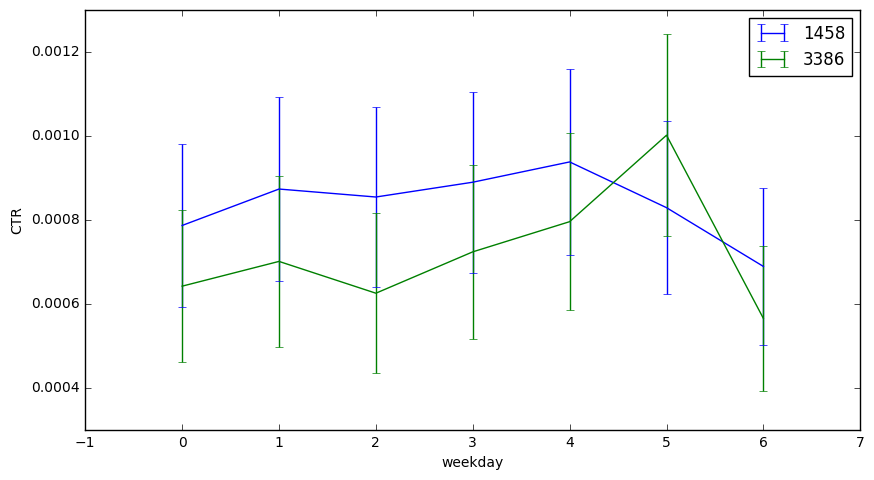

In [42]:
x= "weekday"
y="click"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)


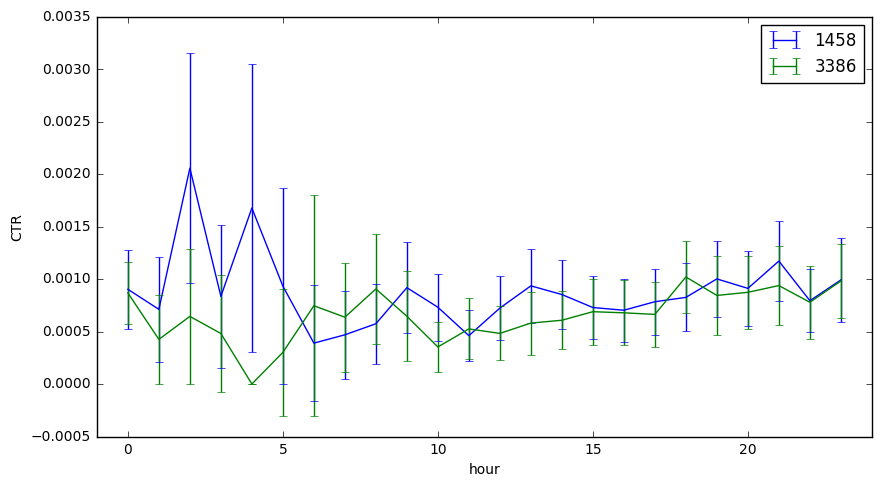

In [43]:
x= "hour"
y="click"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

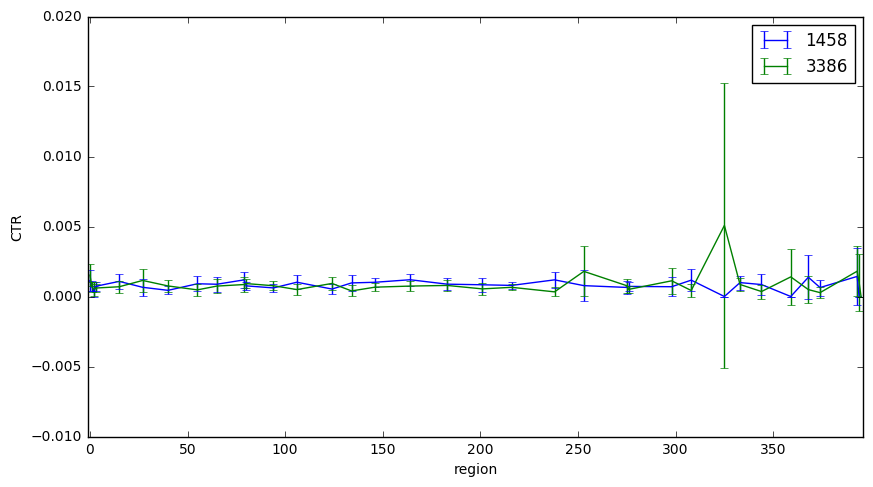

In [44]:
x= "region"
y="click"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

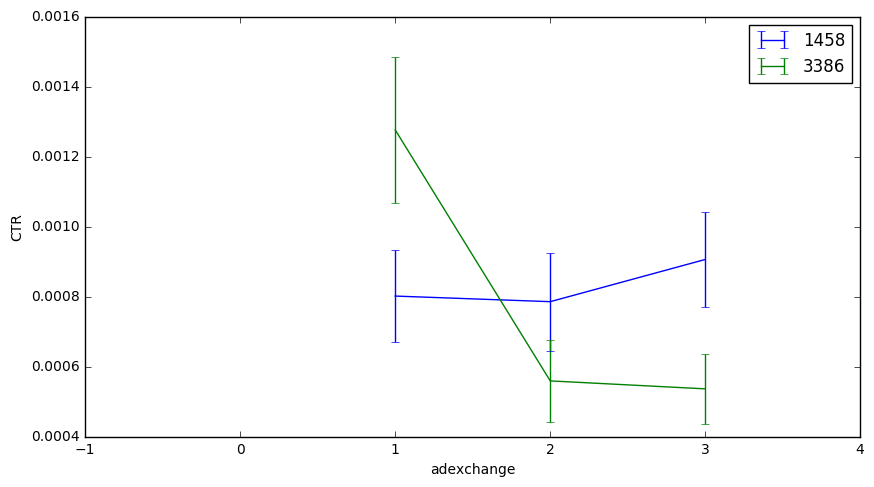

In [46]:
x= "adexchange"
y="click"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

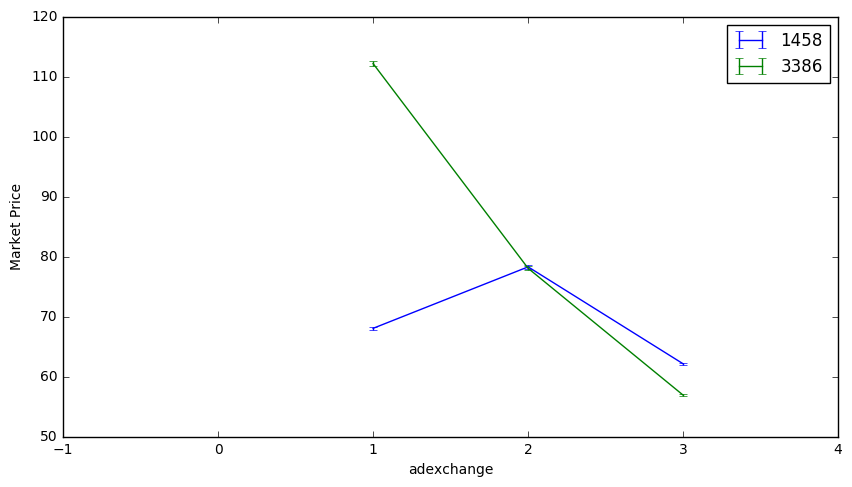

In [48]:
x= "adexchange"
y="payprice"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

In [49]:
processed=pd.read_csv("./dataset/processed.csv")

In [55]:
processed.head()

,Unnamed: 0,click,slotprice,advertiser,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,...,ios,linux,mac,maxthon,opera,other,safari,sogou,theworld,windows
0,0,0,-0.720100,3427,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,2.474611,2997,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,1.175067,3427,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,1.175067,3427,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,-0.584731,3386,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
feature = ["weekday","hour","advertiser","adexchange","area", "slotprice"]

In [103]:
X=train[feature]

In [88]:
Y=train['click']

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_model = RandomForestClassifier(n_estimators=1000)
# Train the RF
rf_model.fit(X, Y)

ValueError: could not convert string to float: 'null'

In [82]:
vali=pd.read_csv("./dataset/validation.csv")

In [ ]:
X=train.drop(['click', 'payprice','bidid'], axis=1)

In [95]:
data["area"] = data["slotheight"]*data["slotwidth"] 

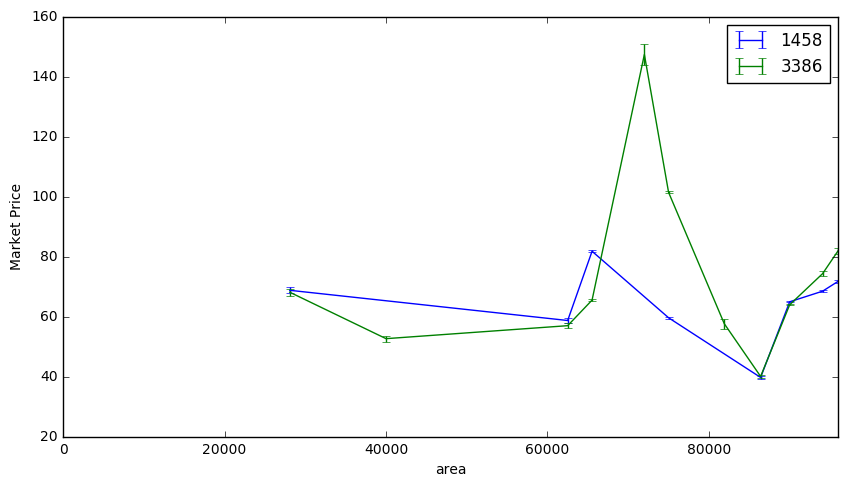

In [96]:
x= "area"
y="payprice"
advert_id=[1458,3386]
adv="advertiser"
plot_ctr(data,y,x,advert_id)

In [98]:
X

,weekday,hour,advertiser,adexchange,slotvisibility,slotformat,slotprice
0,1,14,1458,2,1,0,5
1,2,20,3476,2,1,0,5
2,5,9,1458,1,0,1,0
3,2,20,3427,2,0,0,162
4,6,9,3476,1,0,1,0
5,3,22,3358,1,1,1,0
6,5,16,2259,2,OtherView,Na,5
7,0,21,2821,4,FirstView,Na,0
8,4,17,3386,2,2,0,5
9,0,17,1458,3,0,0,31


In [112]:
data=data.drop('area', axis=1)

In [115]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697738 entries, 0 to 2697737
Data columns (total 26 columns):
click             int64
weekday           int64
hour              int64
bidid             object
logtype           int64
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(12), object(14)
memory usage: 535.1+ MB


In [116]:
data_0 = data[data['click'] == 0]
data_1 = data[data['click'] == 1]

In [117]:
data_0.describe()

,click,weekday,hour,logtype,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2695704.0,2.695704e+06,2.695704e+06,2695704.0,2.695704e+06,2.695704e+06,2.695704e+06,2.695704e+06,2.695704e+06,2.695704e+06,2.695704e+06,2.695704e+06
mean,0.0,2.891143e+00,1.346542e+01,1.0,1.494507e+02,1.543947e+02,5.756584e+02,1.889110e+02,2.648116e+01,2.724578e+02,8.023108e+01,2.847240e+03
std,0.0,2.053879e+00,6.592167e+00,0.0,1.020491e+02,1.032892e+02,3.212505e+02,1.308928e+02,3.703480e+01,2.910818e+01,6.235798e+01,7.821352e+02
min,0.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,1.200000e+02,5.000000e+01,0.000000e+00,2.270000e+02,0.000000e+00,1.458000e+03
25%,0.0,1.000000e+00,1.000000e+01,1.0,7.900000e+01,7.900000e+01,3.000000e+02,9.000000e+01,0.000000e+00,2.410000e+02,3.300000e+01,2.259000e+03
50%,0.0,3.000000e+00,1.400000e+01,1.0,1.460000e+02,1.520000e+02,3.360000e+02,9.000000e+01,5.000000e+00,2.940000e+02,7.000000e+01,3.358000e+03
75%,0.0,5.000000e+00,1.900000e+01,1.0,2.160000e+02,2.220000e+02,9.600000e+02,2.500000e+02,5.000000e+01,3.000000e+02,1.010000e+02,3.427000e+03
max,0.0,6.000000e+00,2.300000e+01,1.0,3.950000e+02,3.990000e+02,1.000000e+03,6.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.476000e+03


In [122]:
df1=data_1.describe()

In [126]:
df1

,click,weekday,hour,logtype,region,city,slotwidth,slotheight,slotprice,bidprice,payprice,advertiser
count,2034.0,2034.000000,2034.000000,2034.0,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000,2034.000000
mean,1.0,2.907080,14.201082,1.0,147.781219,152.887414,558.304818,173.038348,31.358407,272.923304,106.681908,2836.491150
std,0.0,1.911911,6.715450,0.0,102.787226,104.175613,314.657896,126.972432,42.686446,28.881477,68.435094,784.869524
min,1.0,0.000000,0.000000,1.0,0.000000,0.000000,120.000000,50.000000,0.000000,227.000000,5.000000,1458.000000
25%,1.0,1.000000,11.000000,1.0,79.000000,79.000000,300.000000,90.000000,0.000000,241.000000,61.000000,2261.000000
50%,1.0,3.000000,16.000000,1.0,146.000000,148.000000,336.000000,90.000000,5.000000,277.000000,84.000000,3358.000000
75%,1.0,5.000000,19.000000,1.0,216.000000,222.000000,960.000000,250.000000,70.000000,300.000000,152.000000,3427.000000
max,1.0,6.000000,23.000000,1.0,394.000000,399.000000,1000.000000,600.000000,280.000000,300.000000,300.000000,3476.000000


In [141]:
validation=pd.read_csv("./dataset/validation.csv")

In [156]:
def constant_bidding(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
        
    for click, pay_price in train[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

const = pd.DataFrame()
const['constants'] = np.arange(2,200,2)

im = []
clks = []
ct = []
for con in const['constants']:
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(4).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

In [157]:
const

,constants,imps_won,total_spend,clicks,CTR,CPM,CPC
0,2,3004,2473.0,0,0.0,823.24,inf
1,4,7743,12819.0,0,0.0,1655.56,inf
2,6,68665,305894.0,4,0.0058,4454.88,76473.5
3,8,97598,492547.0,42,0.043,5046.69,11727.31
4,10,120248,685350.0,47,0.0391,5699.47,14581.91
5,12,162092,1122444.0,65,0.0401,6924.73,17268.37
6,14,190828,1480771.0,71,0.0372,7759.72,20855.93
7,16,217902,1873159.0,82,0.0376,8596.34,22843.4
8,18,258302,2540536.0,98,0.0379,9835.53,25923.84
9,20,291672,3154881.0,110,0.0377,10816.54,28680.74


In [153]:
const.clicks.max()

85

In [159]:
def constant_bidding_vali(constant):
    impression = 0.0
    clicks = 0
    cost = 0.0
    budget = 6250000
        
    for click, pay_price in validation[['click','payprice']].values:
            if constant > pay_price:
                impression += 1
                clicks += click
                cost += pay_price
            if cost >= budget:
                break
    return impression, clicks, cost

In [160]:
[imps, clicks, cost] = constant_bidding_vali(85)

In [161]:
imps, clicks, cost

(136608.0, 79, 6250017.0)

In [162]:
CTR = clicks / imps
CPM = cost / imps
CPC = cost / clicks

In [163]:
CTR,CPM,CPC

(0.00057829702506441785, 45.751471363316938, 79114.139240506323)